### Understanding the Relationship Between Real-Life Player Performance and the Overall Ratings of Players in FIFA 23 

### Introduction 

FIFA, the popular video game franchise, has been a long-standing favorite among soccer enthusiasts worldwide. The game's success is largely attributed to its realistic portrayal of the sport and its ability to translate real-life statistics into the virtual world. One of the key aspects of FIFA is its player ratings system, which determines the abilities and performance of each player in the game. These ratings are based on a player's real-life statistics, skill set, and potential, among other factors. In this project, we aim to focus on the ratings system for <b>forwards</b> in the top leagues of the world, specifically in the Premier League, La Liga, and Ligue 1. 

### Methodology

The methodology of our project involves a thorough analysis of the dataset that we made, which we have cleaned and organized for smoother analysis. We conduct a series of generalized visualizations that show the relationship between the independent variables and the overall rating of players. These visualizations will provide us with a better understanding of the factors that contribute to a player's rating.

To delve deeper into the analysis, we perform multiple linear regression analysis to understand the impact of different variables on the overall rating of the forwards. We run three separate regressions for each league to account for the differences in playing style, team dynamics, and player attributes. One of the key components of the overall rating system is the international recognition of the league and the player, which can be challenging to quantify. By performing separate regressions for each league, we aim to ensure that our analysis is objective and provides us with a comprehensive understanding of how the rating system works for forwards in these top leagues.

(Note: To account for the dynamic nature of this industry and player transfers between clubs, we have used the initial release overall rating of players, and the clubs where the players ended their 2021/22 season)

### Introducing the Data

To study our research question in-depth we had to compile together a dataset that merged the overall ratings of players in FIFA 23 with their real-life statistics, that we got from the individual league websites. A snippet of this dataset is shown below.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('final_data (1).csv')
data.head()

,Player,Position,League,Squad,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG,Overall
0,Che Adams,FW,Premier League,Southampton,25,30,"2,039",7,3,19.0,33.0,0.31,76
1,Michail Antonio,FW,Premier League,West Ham,31,36,"2,971",10,8,77.0,46.0,0.33,79
2,Adam Armstrong,FW,Premier League,Southampton,24,23,1413,2,2,39.0,30.0,0.29,74
3,Pierre-Emerick Aubameyang,FW,Premier League,Arsenal,32,14,"1,037",4,1,21.0,26.0,0.51,85
4,Jordan Ayew,FW,Premier League,Crystal Palace,29,31,"2,019",3,3,98.0,51.0,0.14,75


### Cleaning and Reorganizing the Data 

To work this dataset and effectively use it to run regressions, we're going to perform several data-cleaning and re-organization procedures.

In [40]:
data=data.set_index('Player') #This allows me to set the players as the index of the dataset

In [41]:
data['Minutes']=data['Minutes'].str.replace(',','') 

In [42]:
data['Minutes']=pd.to_numeric(data['Minutes'])

In [43]:
data.head()

,Position,League,Squad,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG,Overall
Player,,,,,,,,,,,,
Che Adams,FW,Premier League,Southampton,25,30,2039,7,3,19.0,33.0,0.31,76
Michail Antonio,FW,Premier League,West Ham,31,36,2971,10,8,77.0,46.0,0.33,79
Adam Armstrong,FW,Premier League,Southampton,24,23,1413,2,2,39.0,30.0,0.29,74
Pierre-Emerick Aubameyang,FW,Premier League,Arsenal,32,14,1037,4,1,21.0,26.0,0.51,85
Jordan Ayew,FW,Premier League,Crystal Palace,29,31,2019,3,3,98.0,51.0,0.14,75


In [44]:
#The following lines of code will allow to create three sub-datasets, one for each league as explained in our methodology
data_prem_league=data.loc[data['League']=='Premier League']
data_la_liga=data.loc[data['League']=='La Liga']
data_ligue_1=data.loc[data['League']=='Ligue 1']

Having cleaned and reorganized the data, we can now analyze the individual datasets for each league and understand what really influences the overall ratings of players in FIFA 23. 

### Premier League: The Most Competitive League in Professional Football

Let's take a look at the Premier League dataset and understand the intricacies of it, and then use it in an efficient way to run a multivariate linear regression.

In [45]:
#Here we aim to create a dataset that contains all of our relevant independent variables that we suspect have an influence on the overall player ratings
X1=data_prem_league.drop(['Position','League','Squad','Overall'],axis=1)
X1

,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG
Player,,,,,,,,
Che Adams,25,30,2039,7,3,19.0,33.0,0.31
Michail Antonio,31,36,2971,10,8,77.0,46.0,0.33
Adam Armstrong,24,23,1413,2,2,39.0,30.0,0.29
Pierre-Emerick Aubameyang,32,14,1037,4,1,21.0,26.0,0.51
Jordan Ayew,29,31,2019,3,3,98.0,51.0,0.14
...,...,...,...,...,...,...,...,...
Christos Tzolis,19,14,336,0,0,8.0,13.0,0.12
Nikola Vlaši?,23,19,560,1,0,21.0,14.0,0.21
Danny Welbeck,30,25,1478,6,2,22.0,23.0,0.40


Prior to running our regression, we must inspect 'X1' for the presence of imperfect multicollinearity. One way that we can do so is to look at the correlation coefficients between all the independent variables. Let's take a look at that.

In [46]:
X1.corr()

,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG
Age,1.000000,0.344523,0.310036,0.379980,0.197651,0.107150,0.179827,0.014496
Games,0.344523,1.000000,0.929388,0.711012,0.664914,0.725164,0.749645,-0.043989
Minutes,0.310036,0.929388,1.000000,0.802876,0.704363,0.783131,0.812067,-0.013796
Goals,0.379980,0.711012,0.802876,1.000000,0.640723,0.595643,0.674898,0.131913
Assists,0.197651,0.664914,0.704363,0.640723,1.000000,0.589356,0.611655,0.038556
PrgC,0.107150,0.725164,0.783131,0.595643,0.589356,1.000000,0.773964,-0.029436
PrgP,0.179827,0.749645,0.812067,0.674898,0.611655,0.773964,1.000000,-0.024318
xG,0.014496,-0.043989,-0.013796,0.131913,0.038556,-0.029436,-0.024318,1.000000


Uh-oh! As we can see from the correlation coefficient table above, almost all variables except 'Age' and 'xG' seem to be very highly correlated with another. This makes sense because as a player plays more games he is more likely to score more goals, have more assists, complete more progressive passes etc, and obviously play more minutes. 

The presence of imperfect multicollinearity in our data, can be overcome by making some specification changes in our independent variables, and dropping some variables that essentially convey the same information. Specifically, we are going to drop the independent variables 'Games' and 'Minutes', and are going to convert all other variables (except Age) in a 'per minute' form. Let's see if that reduces the correlation between our variables.

In [47]:
column_name=['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG']

for name in column_name:
    X1[name+"_ratio"] = X1[name] / X1['Minutes']
X1

,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG,Minutes_ratio,Goals_ratio,Assists_ratio,PrgC_ratio,PrgP_ratio,xG_ratio
Player,,,,,,,,,,,,,,
Che Adams,25,30,2039,7,3,19.0,33.0,0.31,1.0,0.003433,0.001471,0.009318,0.016184,0.000152
Michail Antonio,31,36,2971,10,8,77.0,46.0,0.33,1.0,0.003366,0.002693,0.025917,0.015483,0.000111
Adam Armstrong,24,23,1413,2,2,39.0,30.0,0.29,1.0,0.001415,0.001415,0.027601,0.021231,0.000205
Pierre-Emerick Aubameyang,32,14,1037,4,1,21.0,26.0,0.51,1.0,0.003857,0.000964,0.020251,0.025072,0.000492
Jordan Ayew,29,31,2019,3,3,98.0,51.0,0.14,1.0,0.001486,0.001486,0.048539,0.025260,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Christos Tzolis,19,14,336,0,0,8.0,13.0,0.12,1.0,0.000000,0.000000,0.023810,0.038690,0.000357
Nikola Vlaši?,23,19,560,1,0,21.0,14.0,0.21,1.0,0.001786,0.000000,0.037500,0.025000,0.000375
Danny Welbeck,30,25,1478,6,2,22.0,23.0,0.40,1.0,0.004060,0.001353,0.014885,0.015562,0.000271


In [48]:
X2=X1.drop(['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG'],axis=1)
X2=X2.drop(['Games','Minutes_ratio'],axis=1)

In [49]:
#Let's rename our columns
X2.columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']

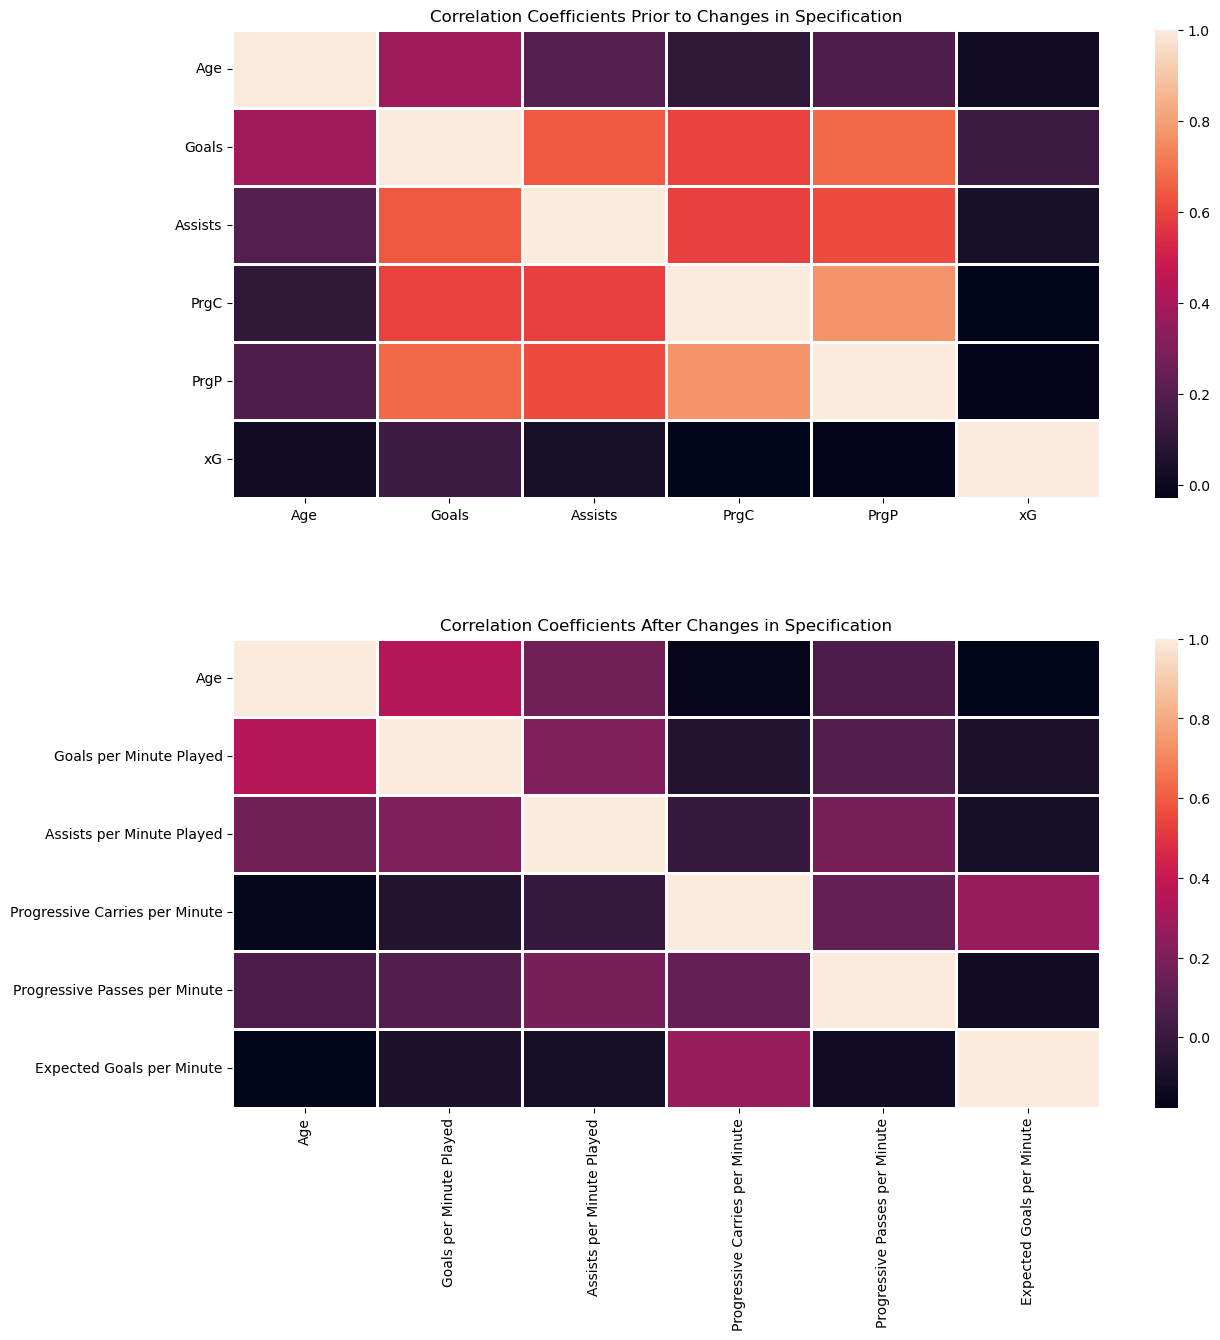

In [50]:
#Let's take a look at the heatmaps for X1 and X2 and see whether our specification changes helped.
fig,(ax1,ax2)=plt.subplots(2,1)
g1=sns.heatmap(X1.drop(['Games','Minutes','Minutes_ratio','Goals_ratio','Assists_ratio','PrgC_ratio','PrgP_ratio','xG_ratio'],axis=1).corr(),cbar=True,linewidth=2,ax=ax1)
g2=sns.heatmap(X2.corr(),linewidth=2,ax=ax2)
fig.set_size_inches(14,14)
g1.set_title('Correlation Coefficients Prior to Changes in Specification')
g2.set_title('Correlation Coefficients After Changes in Specification')

fig.subplots_adjust(hspace=0.3)


As we can see from the comparison of the heatmaps above, our changes in specifications have significantly reduced the correlation between our independent variables, without us losing any information whatsoever. We can therefore proceed with running our multivariate regresssion. 

#### Visualizing the Trends

Now that we've established the format of our regression, let's run some basic data visualizations to gain an understanding of the trends that our independent variables show when viewed against our dependent variable (Overall Rating).

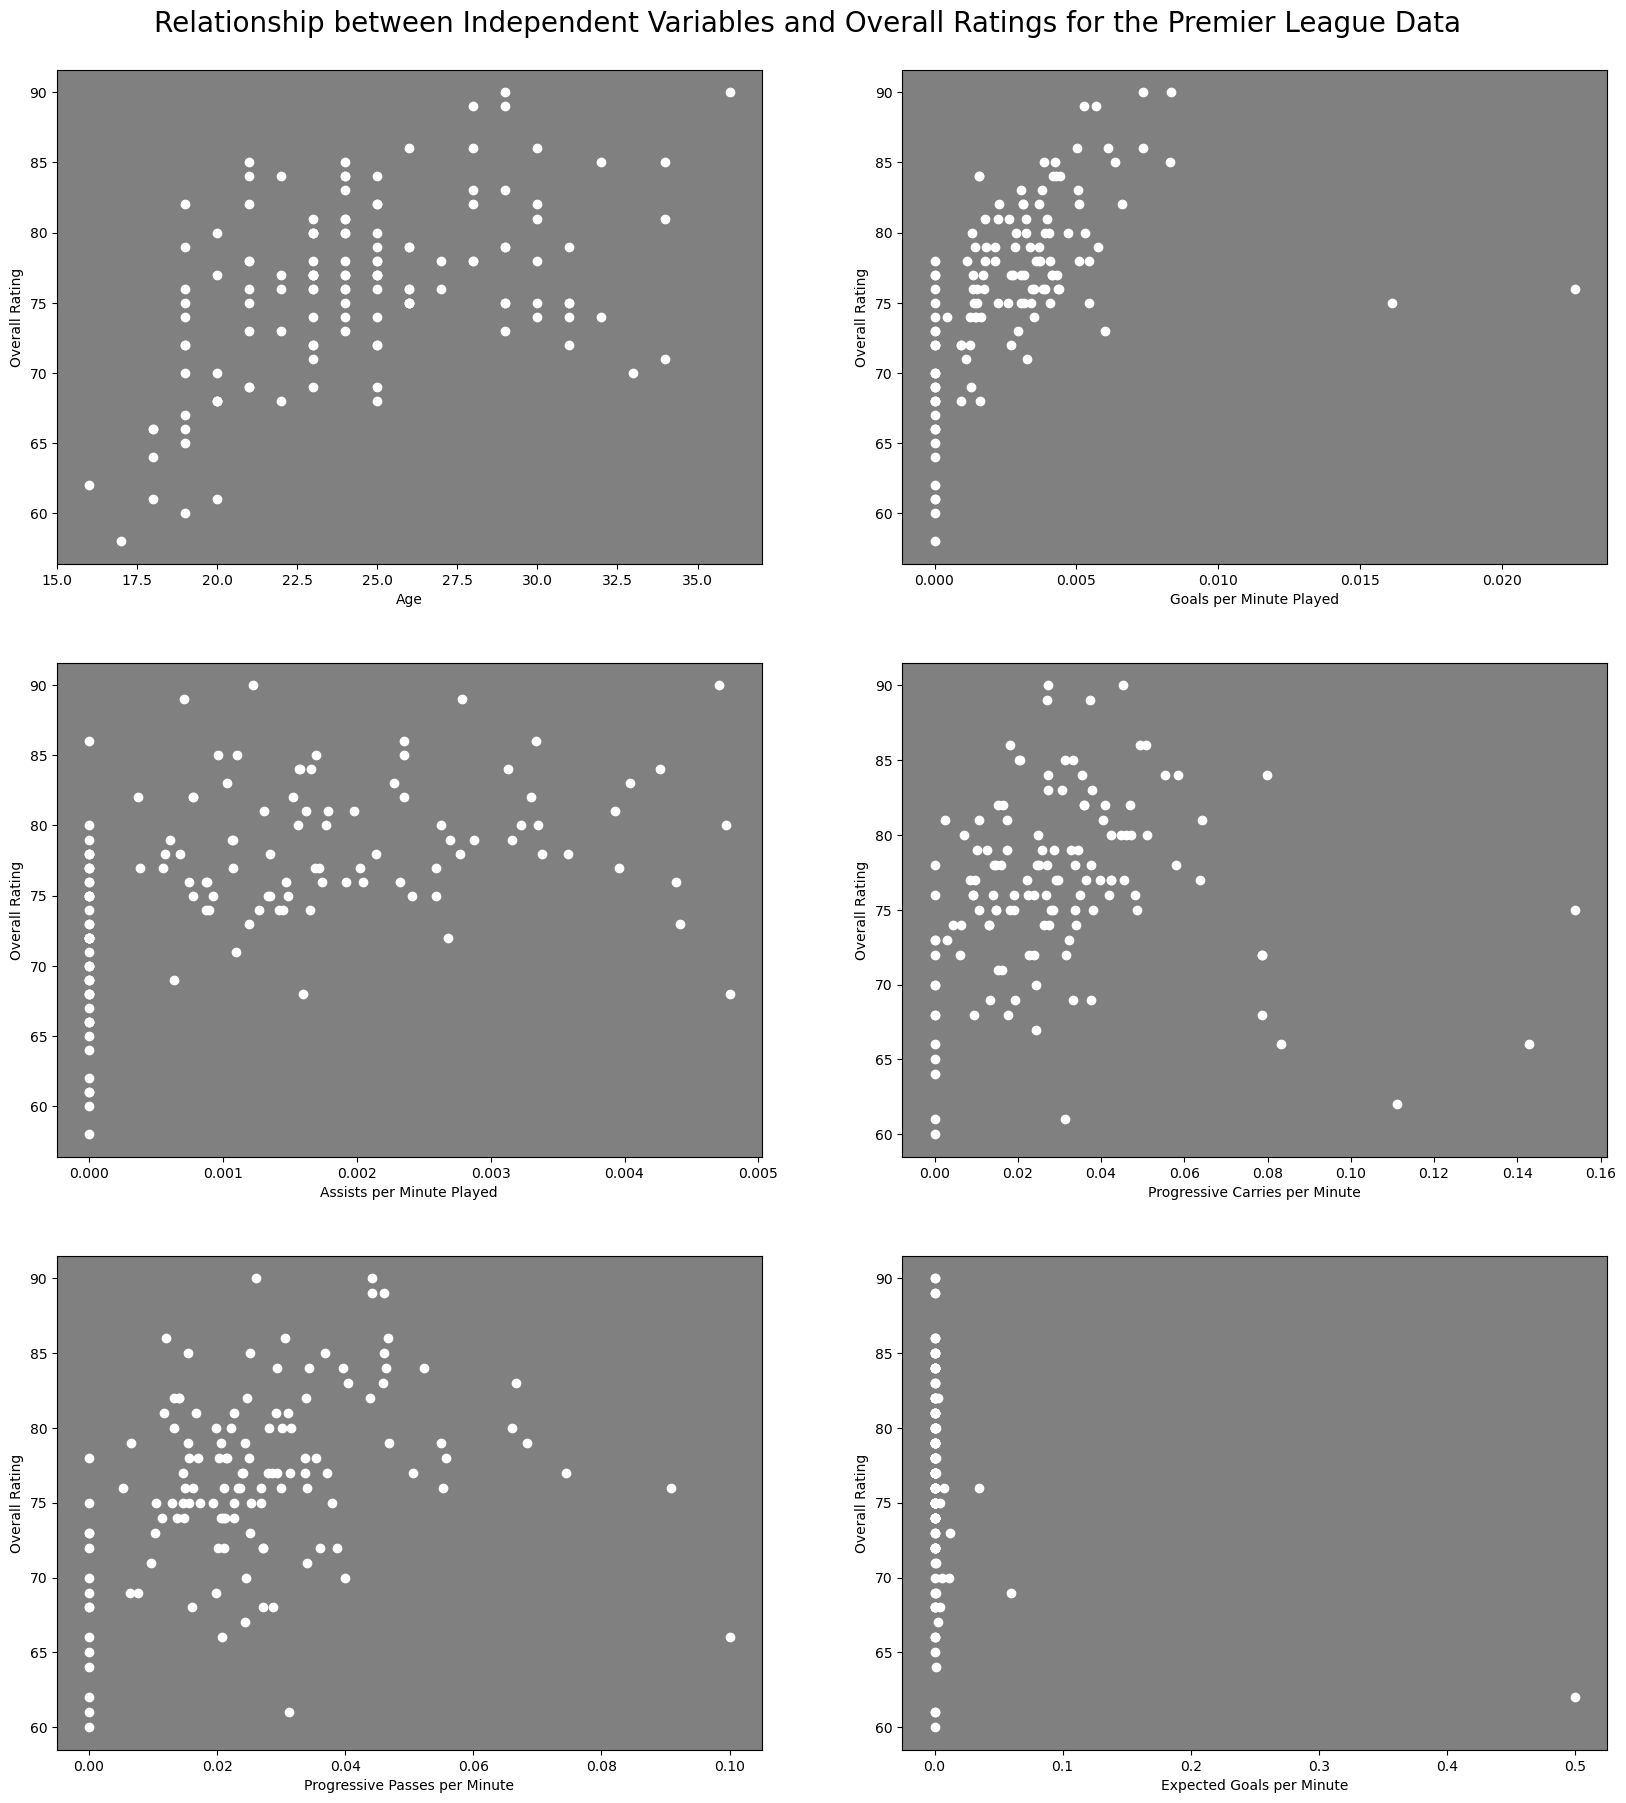

In [51]:
fig,ax=plt.subplots(3,2)
columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(X2[column], data_prem_league['Overall'],color='white')
    ax[row, col].set_xlabel(column)
    ax[row,col].set_facecolor('grey')
    ax[row,col].set_ylabel('Overall Rating')
fig.subplots_adjust(hspace=0.2,top=0.95)
fig.set_size_inches(20,20)
fig.suptitle('Relationship between Independent Variables and Overall Ratings for the Premier League Data',fontsize=20)
plt.show()

From the above scatter plots, we get to see some interesting trends. First we note that most variables are positively correlated with overall rating, although the strength of this correlation varies from variable to variable. Second, we note that 'Expected Goals per Minute' fails to show any significant correlation with 'Overall Rating' although it may be argued that there may be a mild negative correlation. Third and the most important observation here is that we observe varied values for the 'Overall Rating' when 'Progressive Carries per Minute', 'Progressive Passes per Minute', 'Goals per Minute' and/or 'Assists per Minute' were 0.00. This essentially confirms the idea that the 'Overall Rating' in FIFA 23 is an amalgamation of several statistics, or in our case, independent variables, that we can study using our multivariate regression. 

#### Multivariate Regressions Using the Premier League Data

In [52]:
#Here we perform a Linear Regression
X2=X2.fillna(value=0.00)
y=data_prem_league['Overall']
from sklearn import (linear_model, metrics)
X2_lin_reg=linear_model.LinearRegression()
X2_lin_reg.fit(X2,y)

LinearRegression()

In [53]:
#Here we perform a Lasso Regression
X2_lasso_reg=linear_model.Lasso()
X2_lasso_reg.fit(X2,y)

Lasso()

Now that we've run a multivariate lasso and linear regression, let's compare the coefficient values from the two and make some deductions.

In [54]:
regression_coefs=pd.DataFrame({'Coefficient Values from the Premier League Linear Regression':X2_lin_reg.coef_,'Coefficient Values from Lasso Regression':X2_lasso_reg.coef_})
regression_coefs['Independent Variables']=['Age','Goals per Minute','Assists per Minute','Progressive Carries per Minute','Progressive Passes Per Minute','Expected Goals per Minute']
regression_coefs=regression_coefs.set_index('Independent Variables')
regression_coefs

,Coefficient Values from the Premier League Linear Regression,Coefficient Values from Lasso Regression
Independent Variables,,
Age,0.469927,0.671321
Goals per Minute,670.519376,0.000000
Assists per Minute,1390.983428,0.000000
Progressive Carries per Minute,41.741406,0.000000
Progressive Passes Per Minute,80.603931,0.000000
Expected Goals per Minute,-16.660118,-0.000000


As shown from the table above, in the case of the Premier League data, the Lasso regression is rather uninformative about the relation betweeen our explanatory variables and the 'Overall Rating.' This, combined with the fact that we are not so much concerned with the generalization of our regression to other datasets, as we early on established the necessity to create different regression to deal with different league datasets, will mean that the following sections of our paper will follow the multivariate linear regression model.

(Note: An interpretation of this linear regression, along with all others will be present towards the end of our project.)

Let's then examine whether our multivariate linear regression suffers from the problem of overfitting.

In [55]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X2, y, test_size=0.40)
prem_lin_reg=linear_model.LinearRegression()
prem_lin_reg.fit(X_train,y_train)

mse_training=metrics.mean_squared_error(y_train,prem_lin_reg.predict(X_train))
mse_testing=metrics.mean_squared_error(y_test,prem_lin_reg.predict(X_test))
print('MSE on training dataset is',mse_training)
print('MSE on testing dataset is',mse_testing)

MSE on training dataset is 16.596657457820996
MSE on testing dataset is 18.375032523724624


Interestingly enough, the MSE on the testing dataset is lower than on the training dataset and gives us a good idea that there is no severe overfitting problem in our regression on the premier league data.

In [56]:
#Here, we are going to get some more econometric information about our linear regression 
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_hc1
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2)
results=model.fit()
results_robust = results.get_robustcov_results(cov_type='HC1')
print(results_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.64e-53
Time:                        21:22:28   Log-Likelihood:                -367.45
No. Observations:                 130   AIC:                             748.9
Df Residuals:                     123   BIC:                             769.0
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusion: Premier League Dataset

Our conclusion builds on the OLS summary that we generated above. We note that all our variables are statistically significant at the 5% significance level. Furthermore, to account for heteroskedasticity that may be present in our data, we've run HC1 standard error (heteroskedasticity-corrected standard errors) and the fact that our variables are still statistically significant with these standard error values, is further evidence supporting their statistical significance. Furthermore we note that our regression possesses an adjusted R-squared value of 55.5%, implying that our independent variables are able to explain 55.5% of the variation in the overall ratings, which is  acceptable given that all of our variables are statistically significant. 

### La Liga: The Most Technically Elegant League in Professional Football

Given that we have established the changes we would need to make to the specification of our linear regression, this section and the following section will build upon the findings of the Premier League dataset.

We will begin by performing similar data manipulations and use that to generate a multivariate linear regression. We will refrain from performing a lasso regression in this section and the following section as we established previously that it is perhaps not the most suitable method for our research question. 

In [57]:
X1_la_liga=data_la_liga.drop(['Position','League','Squad','Overall'],axis=1)
X1_la_liga

,Age,Games,Minutes,Goals,Assists,PrgC,PrgP,xG
Player,,,,,,,,
Sergio Agüero,33,4,151,1,0,4.0,3.0,0.61
Ilias Akhomach,17,2,124,0,0,7.0,11.0,0.11
Paco Alcácer,27,18,787,1,3,4.0,10.0,0.45
Hugo Álvarez,18,1,11,0,0,0.0,0.0,1.39
Florin Andone,28,5,176,0,0,0.0,2.0,0.12
...,...,...,...,...,...,...,...,...
Óscar Rodríguez Arnaiz,23,11,417,0,0,13.0,22.0,0.13
Rubén Sobrino,29,33,1861,4,1,36.0,38.0,0.26
Mamadou Sylla,27,13,394,0,0,5.0,4.0,0.10


In [58]:
column_name=['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG']

for name in column_name:
    X1_la_liga[name+"_ratio"] = X1_la_liga[name] / X1_la_liga['Minutes']

In [59]:
X1_la_liga=X1_la_liga.drop(['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG'],axis=1)
X1_la_liga=X1_la_liga.drop(['Games','Minutes_ratio'],axis=1)

In [60]:
X1_la_liga.columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']

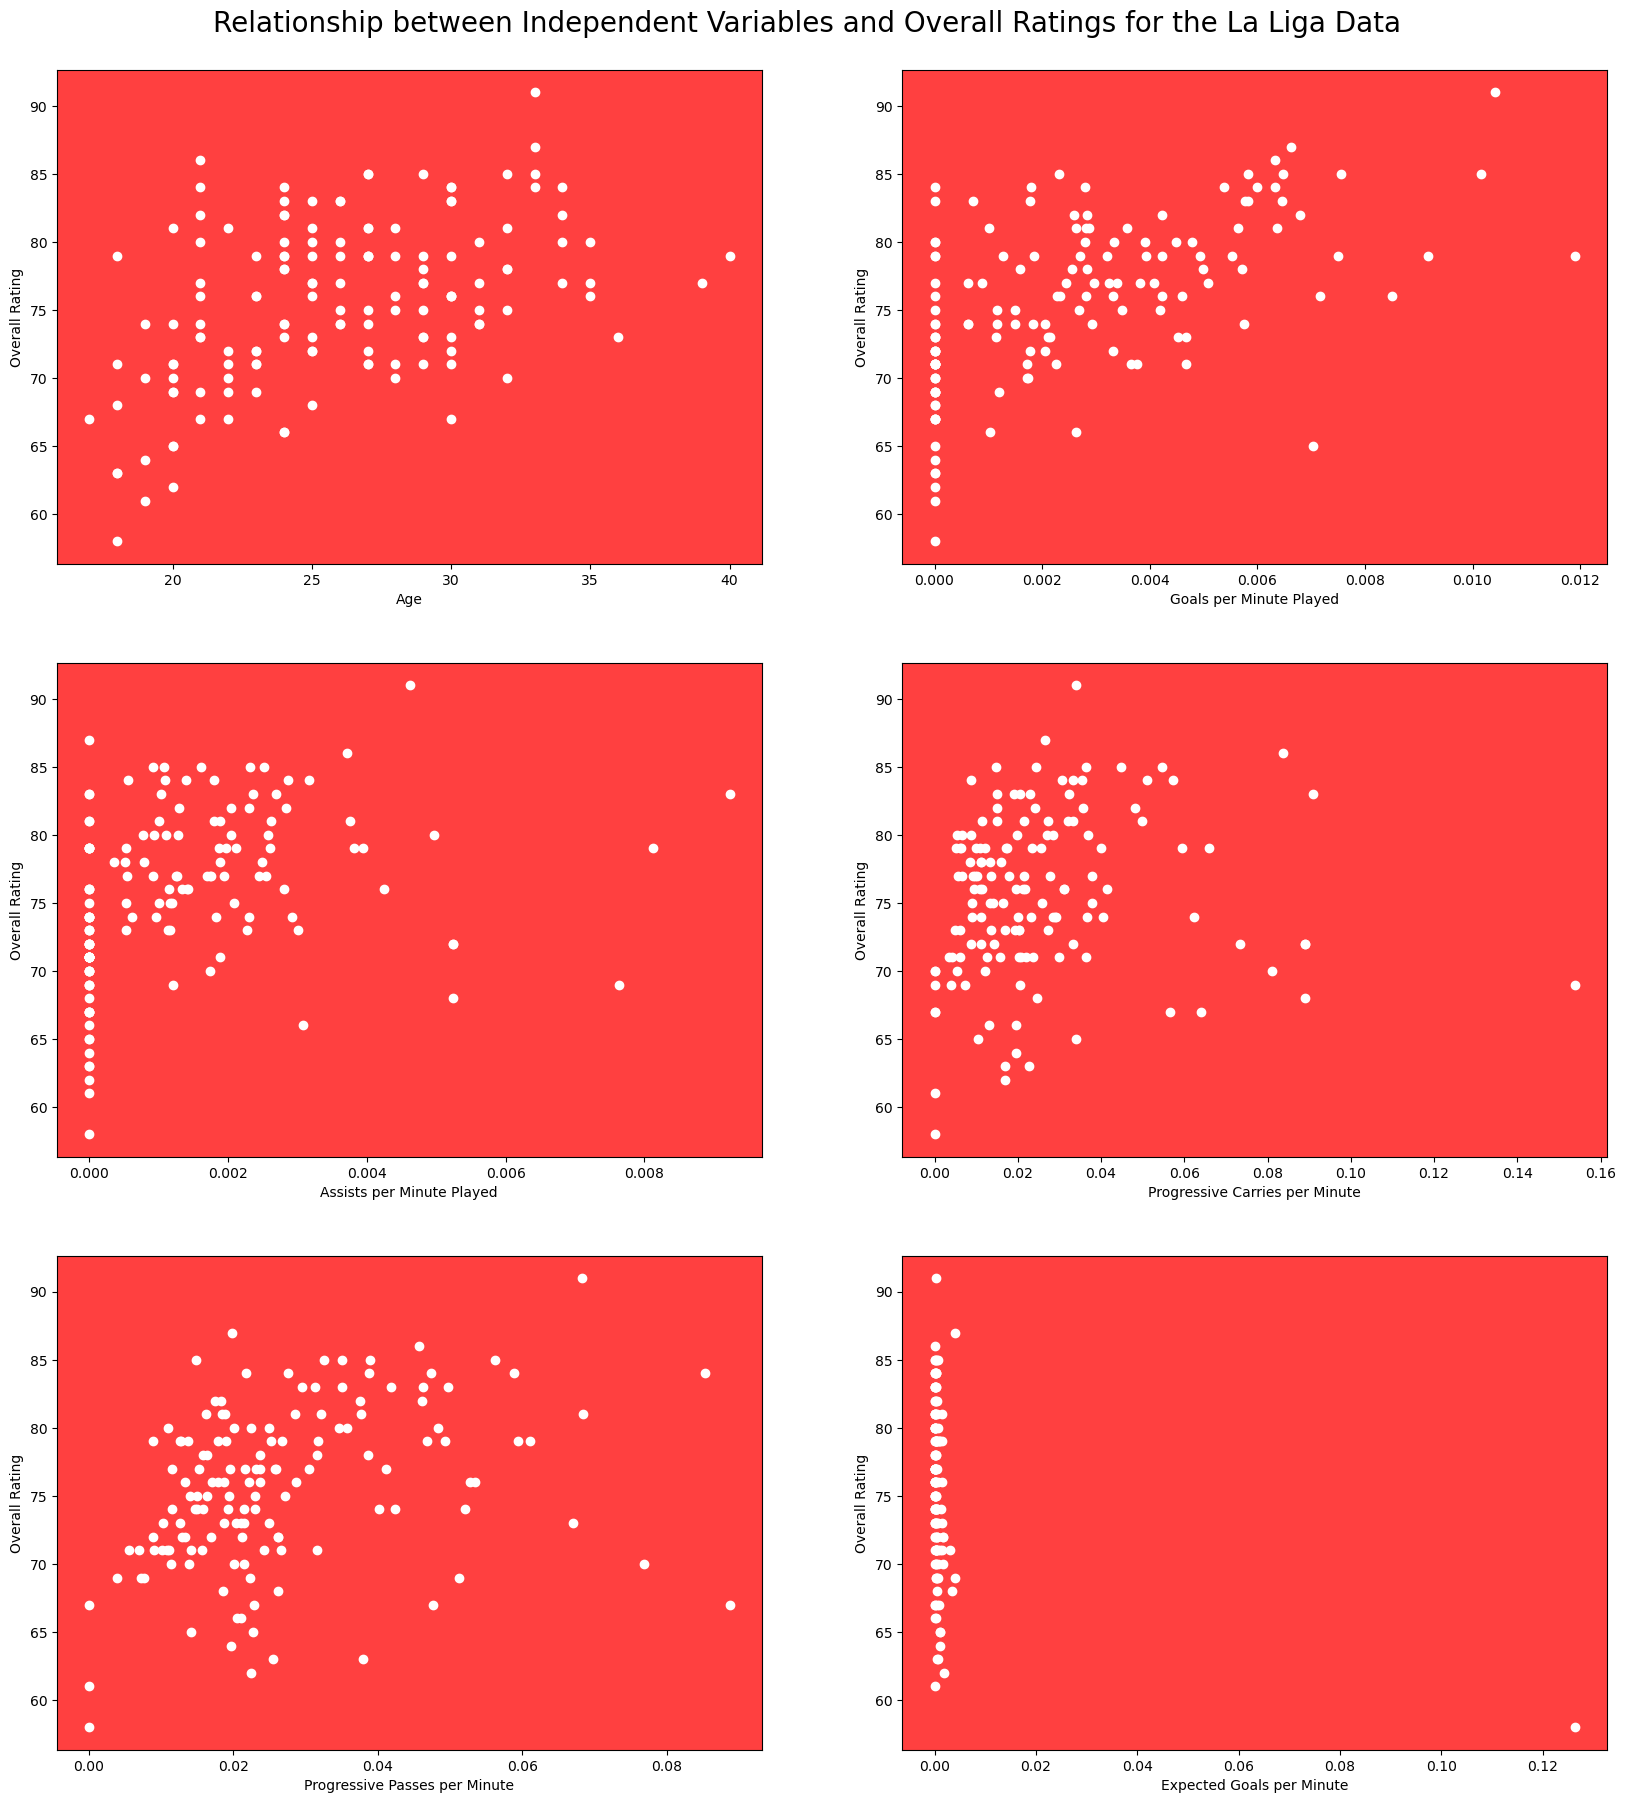

In [61]:
fig,ax=plt.subplots(3,2)
columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(X1_la_liga[column], data_la_liga['Overall'],color='white')
    ax[row, col].set_xlabel(column)
    ax[row,col].set_facecolor('#FF4040')
    ax[row,col].set_ylabel('Overall Rating')
fig.subplots_adjust(hspace=0.2,top=0.95)
fig.set_size_inches(20,20)
fig.suptitle('Relationship between Independent Variables and Overall Ratings for the La Liga Data',fontsize=20)
plt.show()

With the above visualizations, we see a very similar trend to what we observed in the Premier League data, with most variables, except 'Expected Goals per Minute' demonstrating a degree of positive correlation with the dependent variable, 'Overall Ratings.' Our previous observation about the overall rating being an amalgamation of these several statistics is further validated by the above scatter plots, following the same line of reasoning.

In [62]:
#Here we perform a linear regression, similar to what we did before
X1_la_liga=X1_la_liga.fillna(value=0.00)
y_la_liga=data_la_liga['Overall']
X1_la_liga_lin_reg=linear_model.LinearRegression()
X1_la_liga_lin_reg.fit(X1_la_liga,y_la_liga)

LinearRegression()

Let's examine our regression on the La Liga dataset for overfitting

In [63]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1_la_liga, y_la_liga, test_size=0.40)
la_liga_lin_reg=linear_model.LinearRegression()
la_liga_lin_reg.fit(X_train,y_train)

mse_training=metrics.mean_squared_error(y_train,la_liga_lin_reg.predict(X_train))
mse_testing=metrics.mean_squared_error(y_test,la_liga_lin_reg.predict(X_test))
print('MSE on training dataset is',mse_training)
print('MSE on testing dataset is',mse_testing)

MSE on training dataset is 14.941407096642166
MSE on testing dataset is 15.695712562230293


Once again, we note that the MSE on our testing dataset is lower than that on our training dataset, and given that the MSE is not severely high, it further suggests that our regression on the La Liga dataset does not suffer from the problem of overfitting. 

In [64]:
regression_coefs_la_liga=pd.DataFrame({'Coefficient Values from the La Liga Linear Regression':X1_la_liga_lin_reg.coef_})
regression_coefs_la_liga['Independent Variables']=['Age','Goals per Minute','Assists per Minute','Progressive Carries per Minute','Progressive Passes Per Minute','Expected Goals per Minute']
regression_coefs_la_liga=regression_coefs_la_liga.set_index('Independent Variables')
regression_coefs_la_liga

,Coefficient Values from the La Liga Linear Regression
Independent Variables,
Age,0.363794
Goals per Minute,1040.677466
Assists per Minute,663.944250
Progressive Carries per Minute,10.877719
Progressive Passes Per Minute,95.000696
Expected Goals per Minute,-69.279558


In [65]:
#Here, we are going to get some more econometric information about our linear regression on the La Liga dataset
X1_la_liga = sm.add_constant(X1_la_liga)
model_la_liga = sm.OLS(y_la_liga, X1_la_liga)
results_la_liga=model_la_liga.fit()
results_robust_la_liga = results_la_liga.get_robustcov_results(cov_type='HC1')
print(results_robust_la_liga.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     196.8
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.73e-64
Time:                        21:22:32   Log-Likelihood:                -396.92
No. Observations:                 143   AIC:                             807.8
Df Residuals:                     136   BIC:                             828.6
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusion: La Liga Dataset


Our conclusion here will further build upon OLS regression that we ran above. Our findings here are slightly different from that of the Premier League dataset, as here we note that the 'Progressive Carries per Minute' variable is statistically insignificant at the 5% significance level. Our coefficient values are also slightly different, but we will discuss this in a later section of our project. Furthermore we note that our regression possesses an adjusted R-squared value of 56.1%, implying that our independent variables are able to explain 56.1% of the variation in the overall ratings, which is certainly acceptable given that most of our variables are statistically significant.

The key takeaway here is that most (all but one) of our variables are statistically significant at the 5% significant level after accounting for heteroskedasticity in our dataset.

### Ligue 1: One of the Top Five Leagues in World Football

To deal with the Ligue 1 dataset, we will proceed in a similar fashion as to how we've done previously. We will begin with some basic data manipulation and then use our cleaned dataset to generate and interpret the findings from the multivariate linear regression.

In [66]:
X1_ligue_1=data_ligue_1.drop(['Position','League','Squad','Overall'],axis=1)

In [67]:
column_name=['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG']
for name in column_name:
    X1_ligue_1[name+"_ratio"] = X1_ligue_1[name] / X1_ligue_1['Minutes']

In [68]:
X1_ligue_1=X1_ligue_1.drop(['Minutes', 'Goals', 'Assists', 'PrgC', 'PrgP', 'xG'],axis=1)
X1_ligue_1=X1_ligue_1.drop(['Games','Minutes_ratio'],axis=1)


In [69]:
X1_ligue_1.columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']

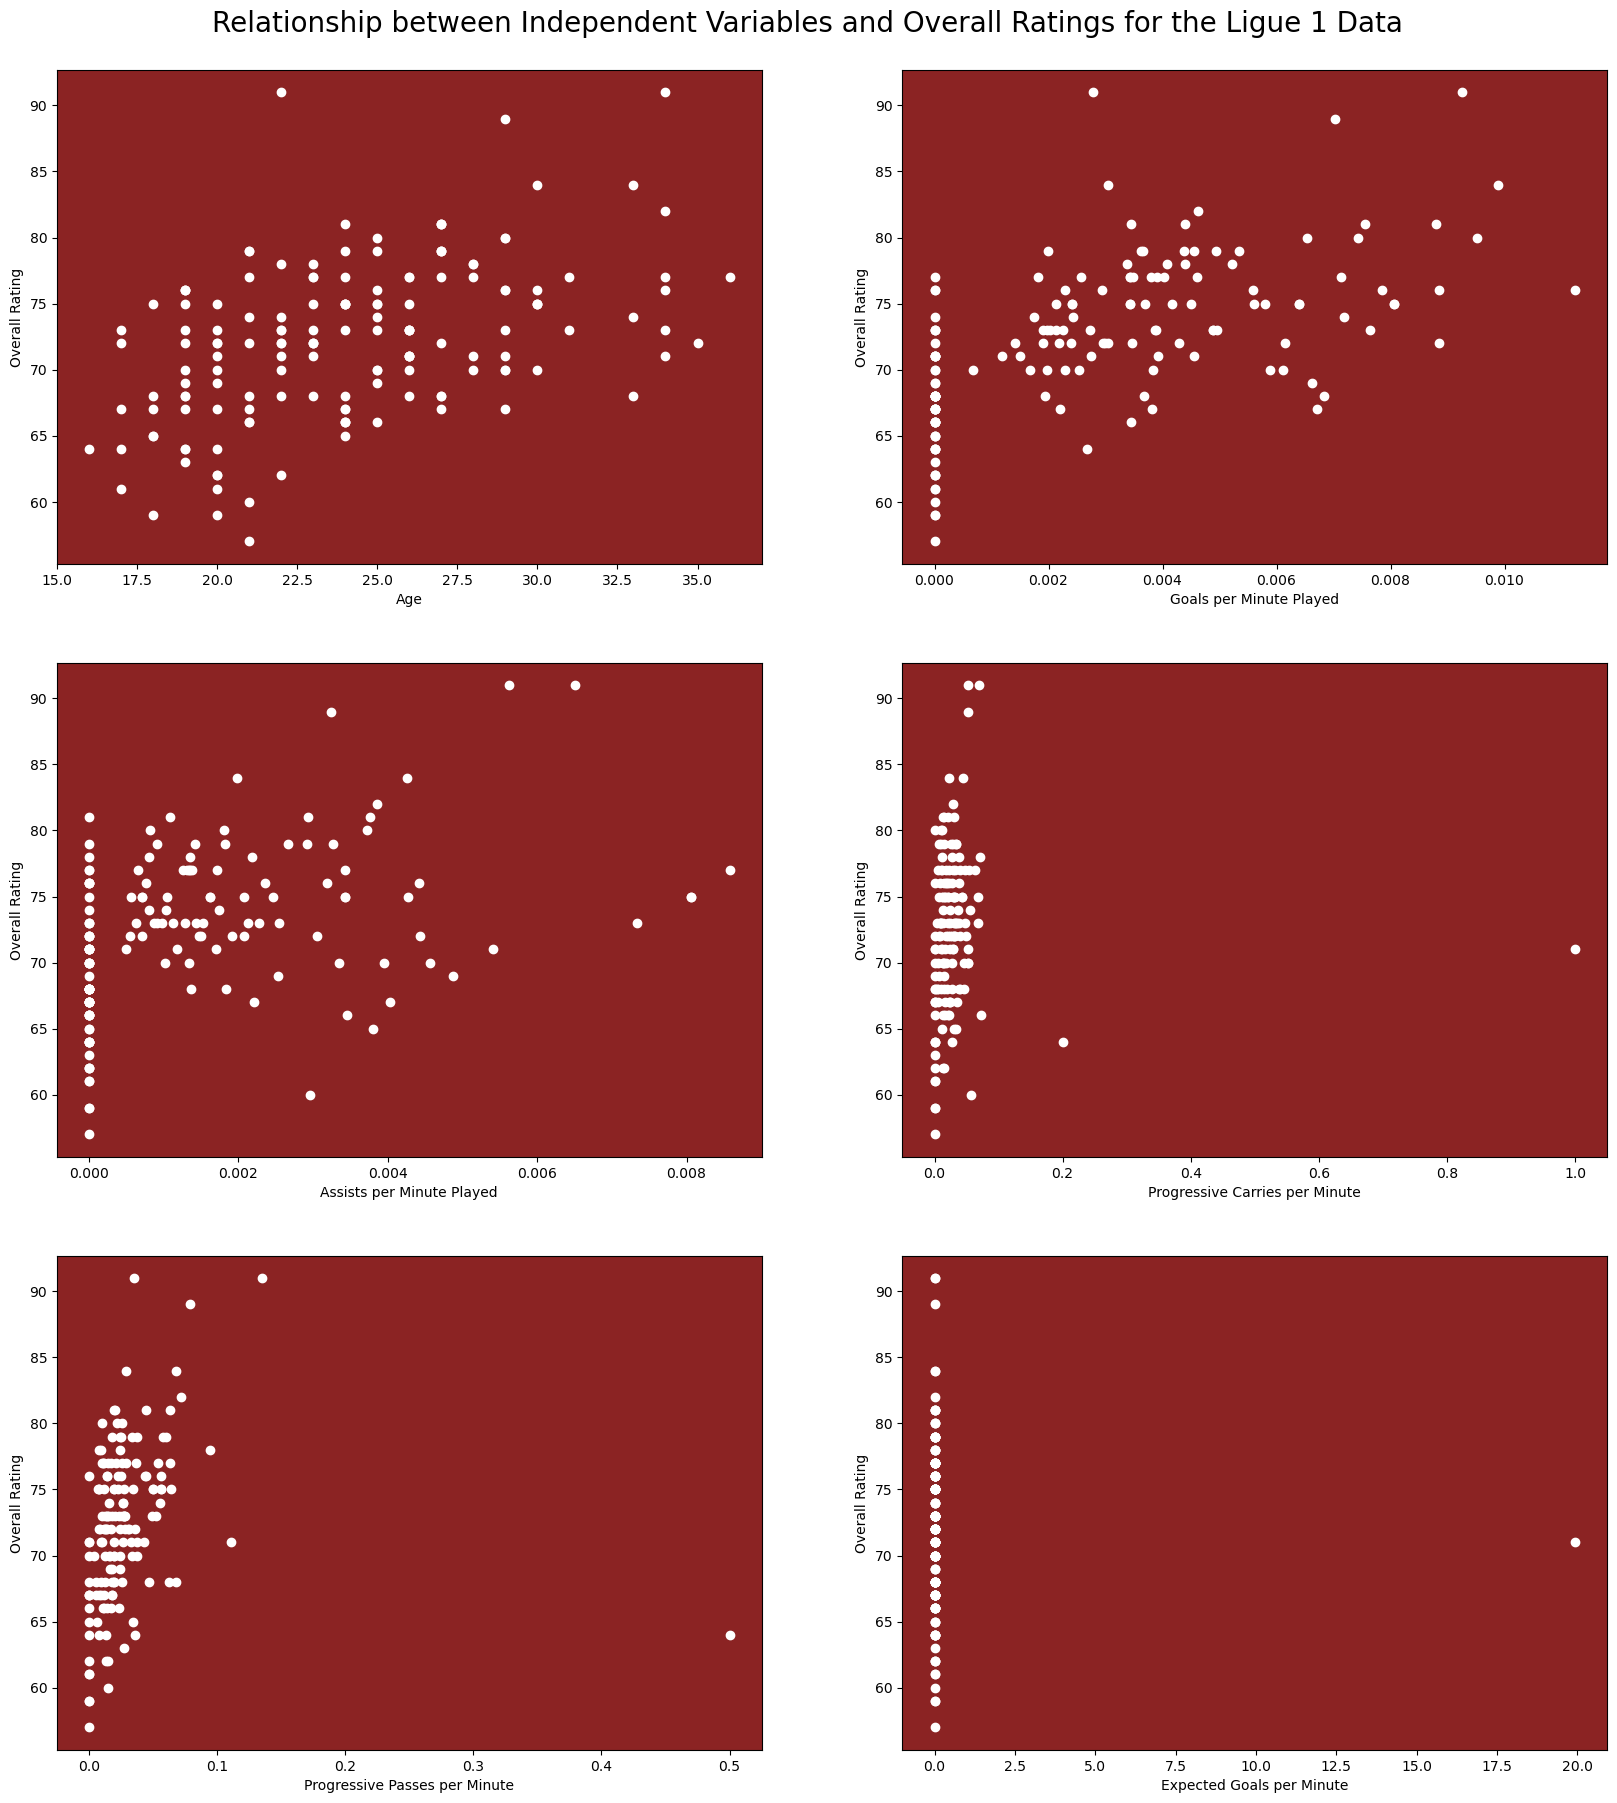

In [70]:
fig,ax=plt.subplots(3,2)
columns=['Age','Goals per Minute Played','Assists per Minute Played','Progressive Carries per Minute','Progressive Passes per Minute','Expected Goals per Minute']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(X1_ligue_1[column], data_ligue_1['Overall'],color='white')
    ax[row, col].set_xlabel(column)
    ax[row,col].set_facecolor('#8B2323')
    ax[row,col].set_ylabel('Overall Rating')
fig.subplots_adjust(hspace=0.2,top=0.95)
fig.set_size_inches(20,20)
fig.suptitle('Relationship between Independent Variables and Overall Ratings for the Ligue 1 Data',fontsize=20)
plt.show()

Once again, we notice a very similar trend for certain variables such as 'Goals per Minute' and 'Assists per Minute','Age'and 'Expected Goals per Minute', however with the Ligue 1 data, what we observe is the degree of positive correlation amongst the remaining variables is much weaker in comparison to the Premier League and La Liga data. Let's see whether our regressions in any way validate this observation. 

In [71]:
X1_ligue_1=X1_ligue_1.fillna(value=0.00)
y_ligue_1=data_ligue_1['Overall']
from sklearn import (linear_model, metrics)
X1_ligue_1_lin_reg=linear_model.LinearRegression()
X1_ligue_1_lin_reg.fit(X1_ligue_1,y_ligue_1)

LinearRegression()

Let's examine our regression on the Ligue 1 dataset for the problem of overfitting. 

In [72]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1_ligue_1, y_ligue_1, test_size=0.40)
ligue_1_lin_reg=linear_model.LinearRegression()
ligue_1_lin_reg.fit(X_train,y_train)

mse_training=metrics.mean_squared_error(y_train,ligue_1_lin_reg.predict(X_train))
mse_testing=metrics.mean_squared_error(y_test,ligue_1_lin_reg.predict(X_test))
print('MSE on training dataset is',mse_training)
print('MSE on testing dataset is',mse_testing)

MSE on training dataset is 11.060910406903627
MSE on testing dataset is 44.45852934750846


Once again we note that the MSE is lower on the testing dataset as compared to the training dataset, and given that the MSE value isn't severely high, we can confirm that our regression on the Ligue 1 dataset does not suffer from the problem of overfitting. 

In [73]:
regression_coefs_ligue_1=pd.DataFrame({'Coefficient Values from the Ligue 1 Linear Regression':X1_ligue_1_lin_reg.coef_})
regression_coefs_ligue_1['Independent Variables']=['Age','Goals per Minute','Assists per Minute','Progressive Carries per Minute','Progressive Passes Per Minute','Expected Goals per Minute']
regression_coefs_ligue_1=regression_coefs_ligue_1.set_index('Independent Variables')
regression_coefs_ligue_1

,Coefficient Values from the Ligue 1 Linear Regression
Independent Variables,
Age,0.403129
Goals per Minute,1031.917299
Assists per Minute,668.425166
Progressive Carries per Minute,37.950466
Progressive Passes Per Minute,16.675084
Expected Goals per Minute,-1.615255


In [74]:
#Similar to what we've done before, we're going to obtain some more econometric information about our regression above
X1_ligue_1 = sm.add_constant(X1_ligue_1)
model_ligue_1 = sm.OLS(y_ligue_1, X1_ligue_1)
results_ligue_1=model_ligue_1.fit()
results_robust_ligue_1 = results_ligue_1.get_robustcov_results(cov_type='HC1')
print(results_robust_ligue_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     18.82
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.32e-16
Time:                        21:22:38   Log-Likelihood:                -431.97
No. Observations:                 155   AIC:                             877.9
Df Residuals:                     148   BIC:                             899.2
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Conclusion: Ligue 1 Dataset


Our conclusions here are slightly more intersting than the ones we've encountered in our previous datasets as here we note that three of our variables are statistically insignificant at the 5% significance level. However, what's more interesting here is that the coefficient values for 'Goals per Minute','Assists per Minute', and 'Age' are very similar to that in the La Liga dataset (this is further validated by the visualization in the conclusion of our paper). 

The next section of our project offers us some insight into the interpretations and findings of our linear regression models that we've run over the course of this project. 

### Research Findings: Interpreting the Linear Regressions

To interpret the three linear regressions that we've run, let's create a table that contains the coefficient values for the three datasets. 

In [75]:
regression_final=pd.concat([regression_coefs,regression_coefs_la_liga,regression_coefs_ligue_1],axis=1)
regression_final=regression_final.drop('Coefficient Values from Lasso Regression',axis=1)
regression_final

,Coefficient Values from the Premier League Linear Regression,Coefficient Values from the La Liga Linear Regression,Coefficient Values from the Ligue 1 Linear Regression
Independent Variables,,,
Age,0.469927,0.363794,0.403129
Goals per Minute,670.519376,1040.677466,1031.917299
Assists per Minute,1390.983428,663.944250,668.425166
Progressive Carries per Minute,41.741406,10.877719,37.950466
Progressive Passes Per Minute,80.603931,95.000696,16.675084
Expected Goals per Minute,-16.660118,-69.279558,-1.615255


This table above allows us to summarize our findings over the course of our project. Let's focus our attention to now interpreting the variables using the Premier League linear regression column as an example. 

1. <b>Age</b>: The regression tells us that for every year a player grows older, his rating would increase by 0.469927 points, this is something that our visualization further confirmed as well. This variable was shown to be statistically significant in all regressions

2. <b>Goals per Minute</b>: At first, this coefficient may look absurd as it suggests that for a 1 unit increase in goals per minute, the overall rating would increase by 670.519376 points.However, it is important to remember that values for goals per minute in our dataset and/or otherwise are often in 1e-3 units as we divide the goals by the aggregate number of minutes a player played in that season. Thus it may be more useful to interpret this as for every 0.001 unit increase in goals score per minute, the ratings would increase by approximately 0.67052 points. This variable was also shown to be statistically significant in all regressions. 

3. <b>Assists per Minute</b>: This variable follows a similar explanation for our 'Goals per Minute' independent variable. It would again be more useful to interpret this as for every 0.001 unit increase in assists delivered per minute, the overall rating would increase by approximately 1.3901 points. This variable was also shown to be statistically significant in all regressions.

4. <b>Progressive Carries per Minute</b>: This again follows a similar explanation to our variables above. It is more useful to interpret this as for every 0.001 unit increase in progressive carries per minute, the overall rating would increase by approximately 0.0417 points. This variable was statistically insignificant in our Ligue 1 and La Liga regressions. 

5. <b>Progressive Passes per Minute</b>: Building upon the above explanantion, for every 0.001 unit increase in progressive passes per minute, the overall rating would increase by approximately 0.0806 points. This variable was shown to be statistically insignificant in our Ligue 1 regression. 

6. <b>Expected Goals per Minute</b>: This variable is perhaps that is a bit ambigious to our regressions as we would expected the coefficient here to be positive. A likely explanation to this is the prevalence of omitted variable bias in our regressions as there are still several variables that are correlated with 'Expected Goals per Minute' and also influence the overall ratings, that we were unable to include in our regression owing to the limited amount of information available. For interpretation purposes however, for every 0.001 unit increase in expected goals per minute, overall rating would decrease by 0.0167 points. 

### Conclusion

We had some interesting takeaways from our regressions above and over the course of this project:

1. The overall rating in FIFA 23 itself is an amalgamation of several statistics, some of which are measurable and therefore dealt with in-depth in our regressions. It is important for us to acknolwedge the fact that given that FIFA assigns ratings based on their network of scouts that visit certain games, there a high degree of subjectivity involved and therefore variables that are tough to measure can have confounding affects (as seen on our 'Expected Goals per Minute variable) 

2. Age, Goals per Minute and Assists per Minute are significant determinants of the overall ratings for attackers in FIFA 23 and have the most impact on the overall rating of players.


Let's visualize how the coefficient values for our independent variables impact the overall rating across the three leagues.


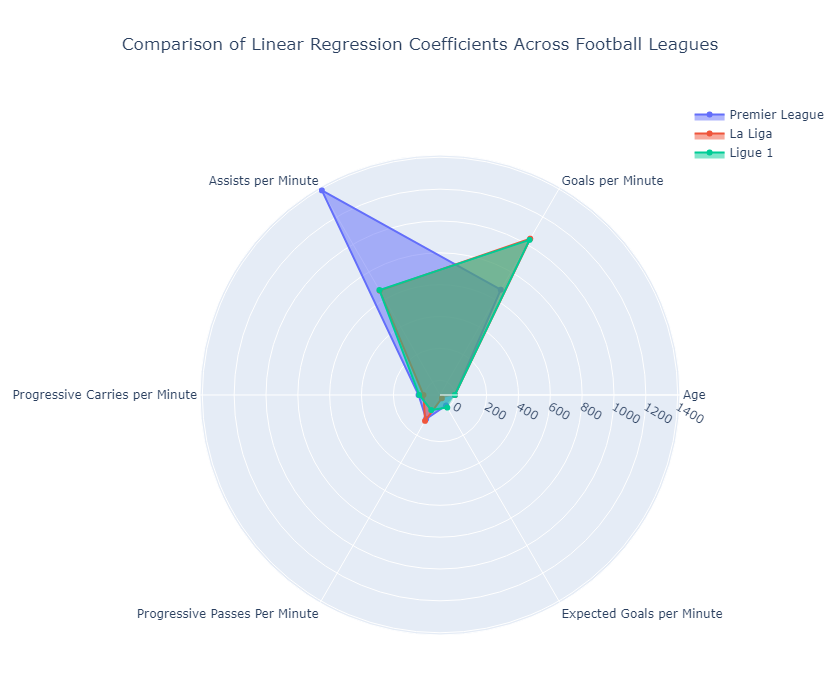

In [77]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import plotly.graph_objects as go
categories = ['Age', 'Goals per Minute', 'Assists per Minute',
       'Progressive Carries per Minute', 'Progressive Passes Per Minute',
       'Expected Goals per Minute']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=X2_lin_reg.coef_,
      theta=categories,
      fill='toself',
      name='Premier League'))
fig.add_trace(go.Scatterpolar(
      r=X1_la_liga_lin_reg.coef_,
      theta=categories,
      fill='toself',
      name='La Liga'))
fig.add_trace(go.Scatterpolar(
      r=X1_ligue_1_lin_reg.coef_,
      theta=categories,
      fill='toself',
      name='Ligue 1'))
fig.update_layout(width=700,height=700,margin_l=200,margin_r=100,margin_autoexpand=True,margin_b=10,title={'text':'Comparison of Linear Regression Coefficients Across Football Leagues',
                                                                                               'x':0.5,
                                                                                               'xanchor':'center'})

While we thoroughly enjoyed dealing and wrangling with datasets of one of the most popular video game franchises in the world, we will continue to find control variables that can reduce the level of subjectivity and confounding surrounding our regressions and work on improving it. 